In [1]:
%matplotlib inline
import softmax_chains_spontaneous_and_driven

In [2]:
CONFIG_SPONTANEOUS = {
    'SEED': None,
    
    'N_CHAINS': 9,
    'CHAIN_LENGTH': 7,
    'GAIN': 6,
    
    'DURATION': 7,
    
    'N_TRIALS': 6,
    
    'FIG_SIZE': (15, 12),
    'COLORS': [(0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1), (0, 1, 1), (1, 0, 1), (.5, .5, 0), (.5, .5, .5), (.5, 0, 0)],
    'LW': 2,
    'FONT_SIZE': 16,
}

/Users/rkp/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1644: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


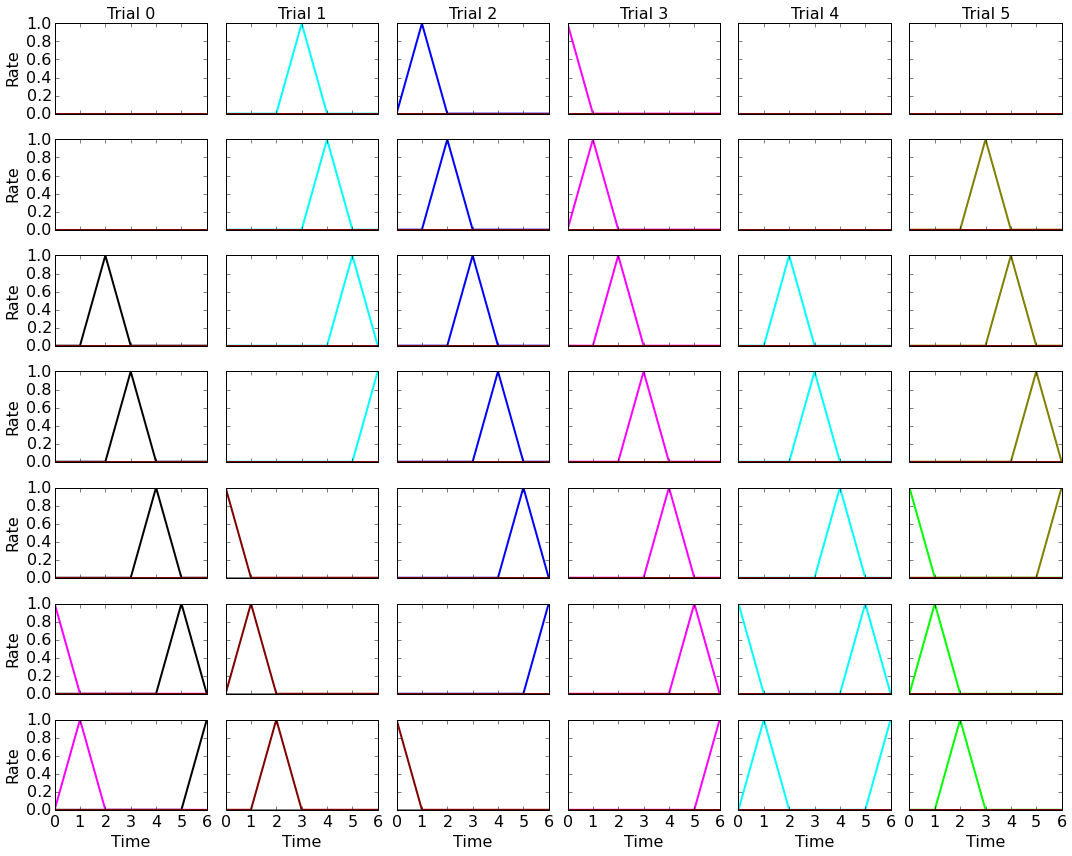

In [3]:
softmax_chains_spontaneous_and_driven.spontaneous(CONFIG_SPONTANEOUS)

In [4]:
CONFIG_DRIVEN = {
    'SEED': None,
    
    'N_CHAINS': 9,
    'CHAIN_LENGTH': 7,
    'GAIN': 6,
    
    'DRIVE_NODE_COORDINATES': [
            [(idx, 0), (idx, 1), (idx, 2), (idx, 3), (idx, 4), (idx, 5), (idx, 6)]
            for idx in range(6)
        ],
    'DRIVE_AMPLITUDE': 3,
    
    'N_TRIALS': 6,
    
    'FIG_SIZE': (15, 12),
    'COLORS': [(0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1), (0, 1, 1), (1, 0, 1), (.5, .5, 0), (.5, .5, .5), (.5, 0, 0)],
    'LW': 2,
    'FONT_SIZE': 16,
}

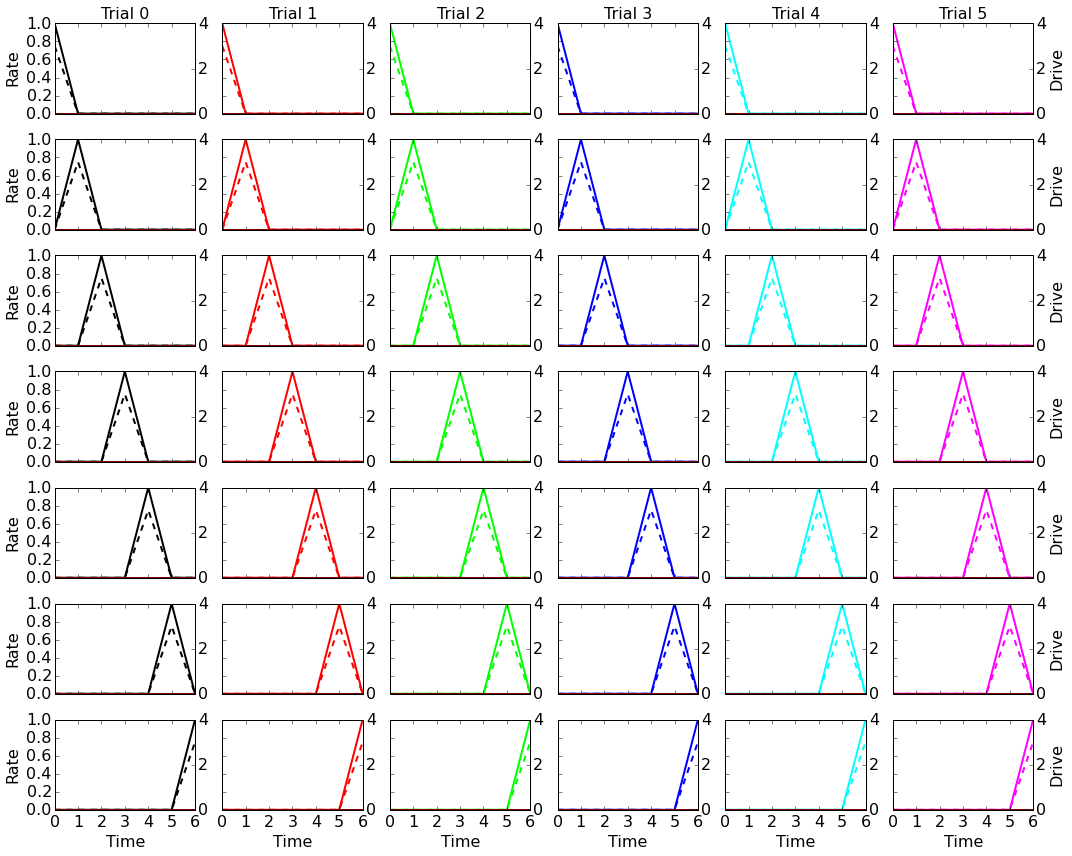

In [5]:
softmax_chains_spontaneous_and_driven.driven(CONFIG_DRIVEN)

In [6]:
CONFIG_DRIVEN['DRIVE_NODE_COORDINATES'] = [
    [(0, 0), (0, 1), (0, 2), (1, 3), (1, 4), (1, 5), (1, 6)]
    for _ in range(6)
    ]

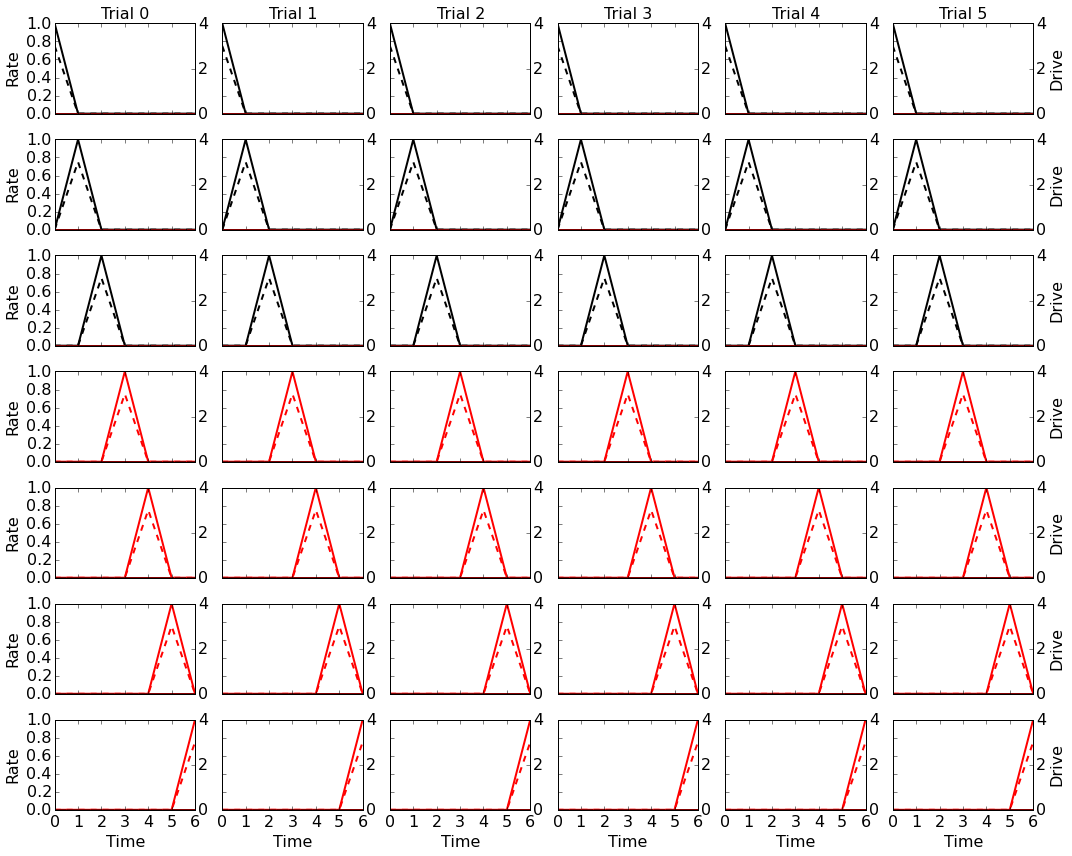

In [7]:
softmax_chains_spontaneous_and_driven.driven(CONFIG_DRIVEN)

In [8]:
CONFIG_DRIVEN['DRIVE_AMPLITUDE'] = 2

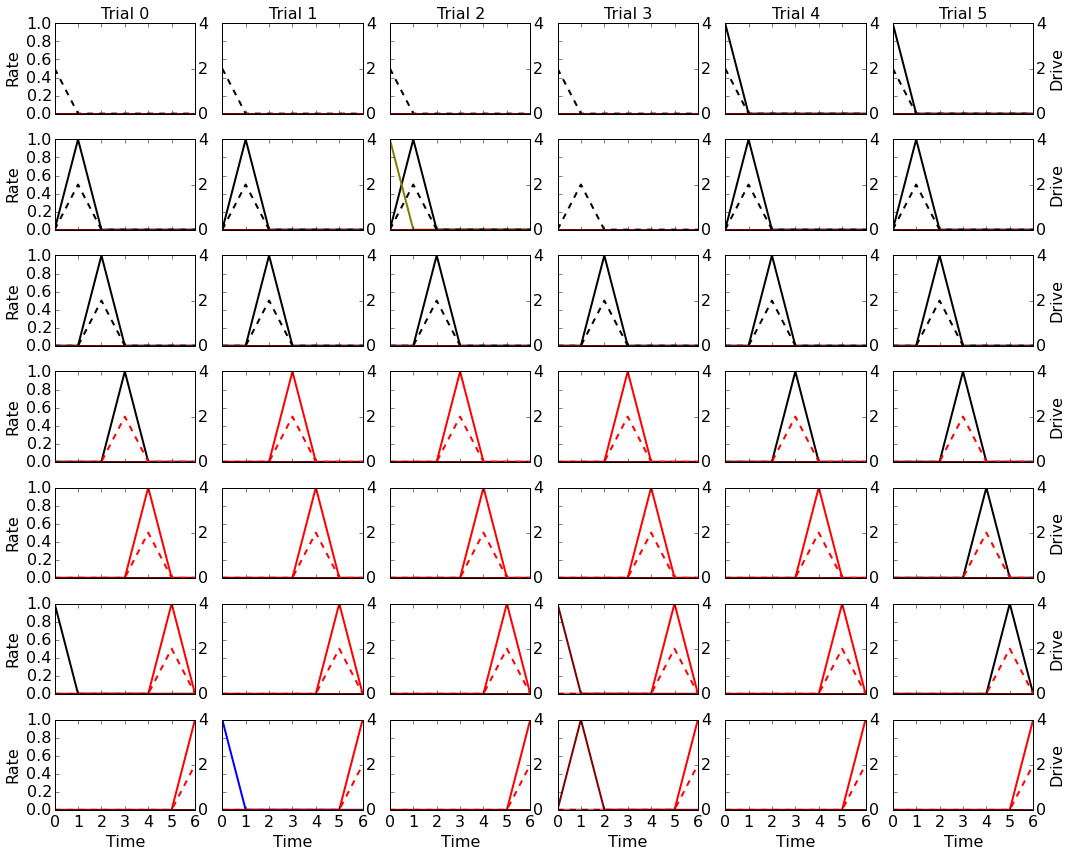

In [9]:
softmax_chains_spontaneous_and_driven.driven(CONFIG_DRIVEN)

In [10]:
CONFIG_DRIVEN['DRIVE_AMPLITUDE'] = 1

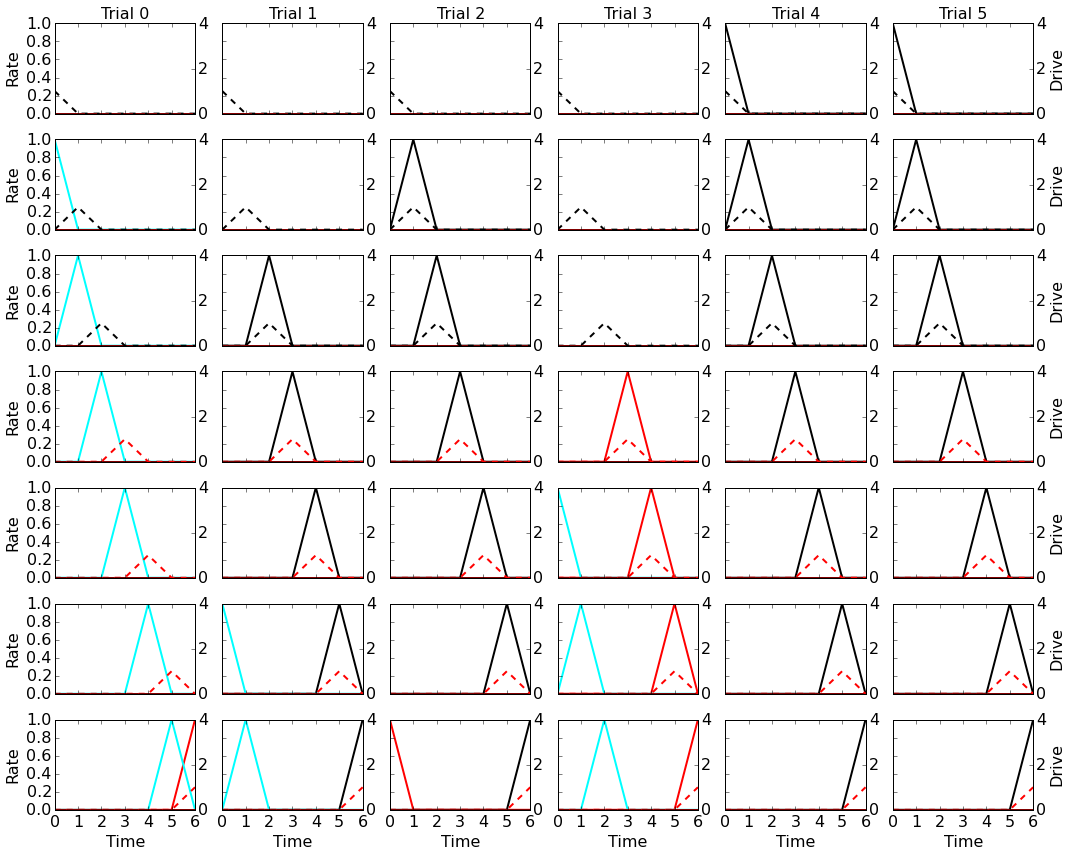

In [11]:
softmax_chains_spontaneous_and_driven.driven(CONFIG_DRIVEN)